<a href="https://colab.research.google.com/github/Gogulaanand/Fault-Diagnosis/blob/master/Fault_Diagnosis(keras).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import tensorflow as tf
from tensorflow.keras import layers
import numpy as np
import pandas as pd
import io
import keras
from keras.layers import Dense,Dropout,Activation
from keras.models import Sequential
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.utils import to_categorical

Using TensorFlow backend.


In [0]:
from google.colab import files
uploaded=files.upload()

Saving projdata1.csv to projdata1.csv


In [0]:
df=pd.read_csv(io.StringIO(uploaded['projdata1.csv'].decode("utf-8")),engine='python',sep=",")
# df1=pd.read_csv(io.StringIO(uploaded['projdata_test_set.csv'].decode("utf-8")),engine='python',sep=",")
ds=df.sample(frac=1)
# ds1=df1.sample(frac=1)
y=ds.as_matrix(columns=ds.columns[4:])
X=ds.as_matrix(columns=ds.columns[1:4])
X_train,X_test,Y_train,Y_test=train_test_split(X,y,test_size=0.2)
Y_train=to_categorical(Y_train,num_classes=4,dtype='int32')
Y_test=to_categorical(Y_test,num_classes=4,dtype='int32')

In [0]:
model=tf.keras.Sequential()

model.add(layers.Dense(10,input_shape=(3,),activation='relu'))
model.add(layers.Dense(10,activation='relu'))
# bias_regularizer=tf.keras.regularizers.l2(0.01),
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(15,activation='relu'))
model.add(layers.Dense(10,activation='relu'))
model.add(layers.Dense(4,activation='relu'))
# model.add(layers.Dropout(0.5))
model.add(layers.Dense(4,activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer=tf.train.AdamOptimizer(0.0005),metrics=['accuracy'])

history=model.fit(X_train,Y_train,validation_split=0.25,epochs=550,batch_size=128)

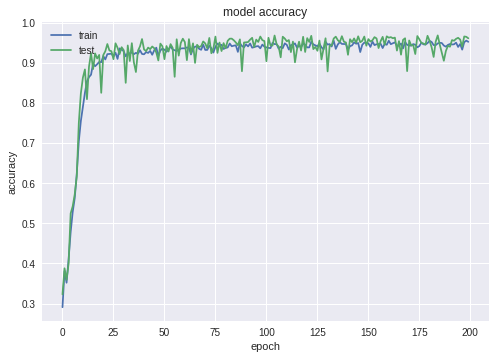

In [0]:
#model accuracy plot
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#model loss plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#test data evaluation
test_loss,test_acc=model.evaluate(X_test,Y_test,batch_size=64)
print(test_acc)